
--- 무작위 포트폴리오 생성 ---
25000개의 무작위 포트폴리오 생성 완료.

--- 최적화된 포트폴리오 지점 계산 완료 ---
 - Max Calmar Ratio: Return=8.47%, Volatility=5.20%, Sharpe=1.63
 - Risk Parity: Return=7.85%, Volatility=7.36%, Sharpe=1.07
 - Minimum Variance: Return=1.38%, Volatility=1.89%, Sharpe=0.73
 - Daily (30% Cap): Return=18.16%, Volatility=11.36%, Sharpe=1.60
 - Target Return (return%): Return=18.00%, Volatility=11.26%, Sharpe=1.60

--- 효율적 투자선 시각화 ---


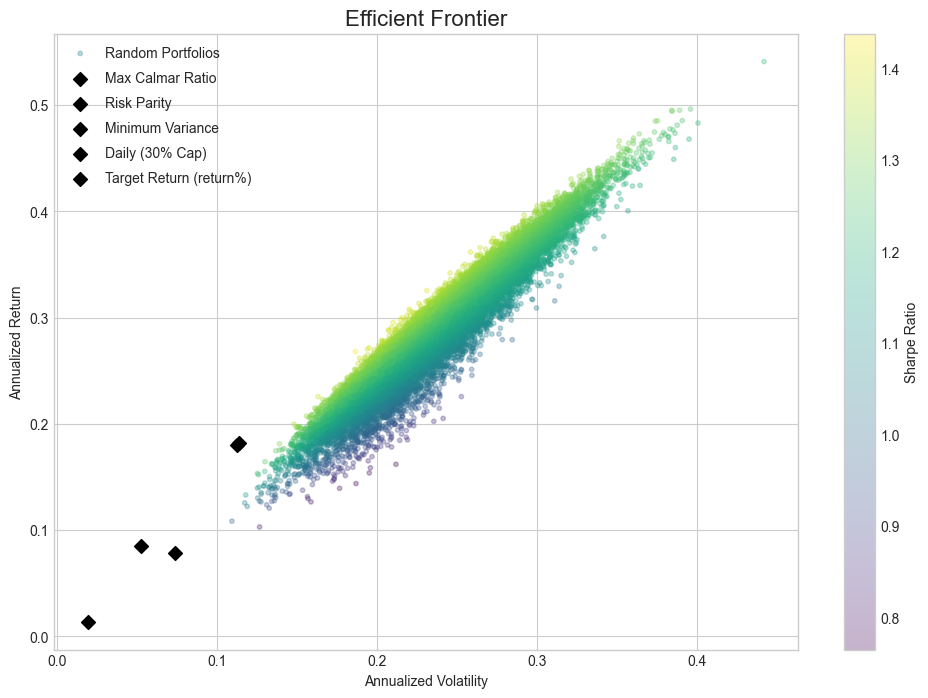

In [1]:
# 8. 실행 파일 3. Efficient Frontier Line 시각화 실행 모듈. 

import pandas as pd
import config
from data_manager import DataManager
from portfolio_optimizer import PortfolioOptimizer
from visualizer import Visualizer
from utils import format_model_name

# 1. 데이터 로드
dm = DataManager()
try:
    stock_data = pd.read_csv(config.RAW_DATA_PATH, index_col=0, parse_dates=True)
    all_weights_dict = pd.read_excel(config.OPTIMAL_WEIGHTS_SAVE_PATH, sheet_name=None)
    daily_returns = dm.calculate_returns(stock_data, 'daily')
except FileNotFoundError:
    print(f"오류: 필수 파일이 없습니다. '1_run_optimization.ipynb'을 먼저 실행하세요.")
    exit()

# 2. 무작위 포트폴리오 생성
print("\n--- 무작위 포트폴리오 생성 ---")
optimizer = PortfolioOptimizer(daily_returns)
random_ports = optimizer.generate_random_portfolios(config.NUM_RANDOM_PORTFOLIOS)
print(f"{config.NUM_RANDOM_PORTFOLIOS}개의 무작위 포트폴리오 생성 완료.")

# 3. 최적화된 포트폴리오 성과 계산
optimal_points = {}
for name, df in all_weights_dict.items():
    weights = df['Optimal_Weight'].values
    metrics = optimizer.calculate_metrics(weights)
    model_name = format_model_name(name)
    optimal_points[model_name] = metrics

print("\n--- 최적화된 포트폴리오 지점 계산 완료 ---")
for name, point in optimal_points.items():
    print(f" - {name}: Return={point['return']:.2%}, Volatility={point['volatility']:.2%}, Sharpe={point['sharpe']:.2f}")

# 4. 시각화
print("\n--- 효율적 투자선 시각화 ---")
visualizer = Visualizer(results={})
visualizer.plot_efficient_frontier(random_ports, optimal_points)